##PRINCIPAL COMPONENT ANALYSIS

In [50]:
import pandas as pd

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import pdist


In [52]:
df1=pd.read_csv("utah_property.csv")

In [53]:
df1.head()

,type,text,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,lastSoldOn,listPrice,status,property_type
0,single_family,"Escape to tranquility with this off-grid, unfi...",2020.0,1.0,1.0,1.0,1.0,2.0,71438.0,696.0,2.0,2018-05-31,90000.0,for_sale,Affordable
1,single_family,Beautiful home in the desirable Oak Hills and ...,1968.0,4.0,3.0,2.0,1.0,2.0,56628.0,3700.0,2.0,2018-05-31,799000.0,for_sale,Luxury
2,single_family,"Welcome to your new home, nestled in the heart...",1985.0,4.0,3.0,3.0,1.0,1.0,10019.0,3528.0,2.0,2018-05-31,389900.0,for_sale,Affordable
3,single_family,Investment Opportunity. House needs some work ...,1936.0,4.0,2.0,2.0,1.0,2.0,12632.0,2097.0,2.0,2018-04-16,300000.0,for_sale,Affordable
4,land,Deer Springs Ranch is an 8000 Ac Ranch in an H...,2003.0,4.0,0.0,2.0,1.0,2.0,872071.0,2400.0,2.0,2018-05-31,70000.0,for_sale,Affordable


In [54]:
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4440 entries, 0 to 4439
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           4440 non-null   object 
 1   text           4440 non-null   object 
 2   year_built     4440 non-null   float64
 3   beds           4440 non-null   float64
 4   baths          4440 non-null   float64
 5   baths_full     4440 non-null   float64
 6   baths_half     4440 non-null   float64
 7   garage         4440 non-null   float64
 8   lot_sqft       4440 non-null   float64
 9   sqft           4440 non-null   float64
 10  stories        4440 non-null   float64
 11  lastSoldOn     4440 non-null   object 
 12  listPrice      4440 non-null   float64
 13  status         4440 non-null   object 
 14  property_type  4437 non-null   object 
dtypes: float64(10), object(5)
memory usage: 520.4+ KB
None


In [55]:
df1 = df1.drop(columns=['type', 'text', 'status','lastSoldOn'])

In [56]:
df1.head()

,year_built,beds,baths,baths_full,baths_half,garage,lot_sqft,sqft,stories,listPrice,property_type
0,2020.0,1.0,1.0,1.0,1.0,2.0,71438.0,696.0,2.0,90000.0,Affordable
1,1968.0,4.0,3.0,2.0,1.0,2.0,56628.0,3700.0,2.0,799000.0,Luxury
2,1985.0,4.0,3.0,3.0,1.0,1.0,10019.0,3528.0,2.0,389900.0,Affordable
3,1936.0,4.0,2.0,2.0,1.0,2.0,12632.0,2097.0,2.0,300000.0,Affordable
4,2003.0,4.0,0.0,2.0,1.0,2.0,872071.0,2400.0,2.0,70000.0,Affordable


In [57]:
df1.shape

(4440, 11)

In [58]:
df1 = df1.drop(columns=['baths_half', 'lot_sqft'])

In [59]:
df1['sqft'].fillna(df1['sqft'].median(), inplace=True)
df1['listPrice'].fillna(df1['listPrice'].median(), inplace=True)


<ipython-input-59-b505d7e3b932>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['sqft'].fillna(df1['sqft'].median(), inplace=True)
<ipython-input-59-b505d7e3b932>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

In [60]:
df1['beds'].fillna(df1['beds'].mode()[0], inplace=True)
df1['baths'].fillna(df1['baths'].mode()[0], inplace=True)
df1['baths_full'].fillna(df1['baths_full'].mode()[0], inplace=True)
df1['garage'].fillna(df1['garage'].mode()[0], inplace=True)
df1['stories'].fillna(df1['stories'].mode()[0], inplace=True)
df1['year_built'].fillna(df1['year_built'].mode()[0], inplace=True)

<ipython-input-60-6d153d3f48ae>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['beds'].fillna(df1['beds'].mode()[0], inplace=True)
<ipython-input-60-6d153d3f48ae>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

In [61]:
null_counts_new = df1.isnull().sum()
print(null_counts_new)

year_built       0
beds             0
baths            0
baths_full       0
garage           0
sqft             0
stories          0
listPrice        0
property_type    3
dtype: int64


In [62]:
df1=df1.drop(columns=["property_type"])

In [63]:
df1 = df1.astype(int)

In [64]:
df1.head()

,year_built,beds,baths,baths_full,garage,sqft,stories,listPrice
0,2020,1,1,1,2,696,2,90000
1,1968,4,3,2,2,3700,2,799000
2,1985,4,3,3,1,3528,2,389900
3,1936,4,2,2,2,2097,2,300000
4,2003,4,0,2,2,2400,2,70000


In [65]:
import numpy as np

# Select numerical columns for outlier detection
num_cols = df1.select_dtypes(include=[np.number]).columns

# Define a function to remove outliers using IQR
def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply outlier removal
df1_cleaned = remove_outliers(df1, num_cols)

# Print before and after shape
print(f"Original Shape: {df1.shape}")
print(f"After Outlier Removal: {df1_cleaned.shape}")


Original Shape: (4440, 8)
After Outlier Removal: (1202, 8)


In [66]:
df1.dtypes

,0
year_built,int64
beds,int64
baths,int64
baths_full,int64
garage,int64
sqft,int64
stories,int64
listPrice,int64


In [67]:
df1.head(100)

,year_built,beds,baths,baths_full,garage,sqft,stories,listPrice
0,2020,1,1,1,2,696,2,90000
1,1968,4,3,2,2,3700,2,799000
2,1985,4,3,3,1,3528,2,389900
3,1936,4,2,2,2,2097,2,300000
4,2003,4,0,2,2,2400,2,70000
...,...,...,...,...,...,...,...,...
95,1996,3,2,2,2,1476,1,535000
96,1926,3,1,1,2,1060,2,389000
97,2003,3,3,2,2,1606,2,389990
98,1994,6,2,1,2,2197,2,519500


In [68]:
df1.to_csv('cleaned_utah.csv')

Step 3: Normalize the Data Using StandardScaler

In [69]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Normalize the dataset
df_scaled = scaler.fit_transform(df1)

# Convert back to DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df1.columns)

# Check summary statistics to confirm standardization
df_scaled.describe()


,year_built,beds,baths,baths_full,garage,sqft,stories,listPrice
count,4.440000e+03,4.440000e+03,4.440000e+03,4.440000e+03,4.440000e+03,4.440000e+03,4.440000e+03,4.440000e+03
mean,3.248653e-15,6.401286e-18,-7.681543e-17,1.040209e-16,9.441897e-17,4.800964e-17,1.312264e-16,-1.440289e-17
std,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00,1.000113e+00
min,-5.843447e+00,-2.287304e+00,-1.372096e+00,-1.063543e+00,-2.277980e+00,-1.745939e+00,-1.589307e+00,-4.600639e-01
25%,-3.993800e-02,-7.069073e-01,-2.541757e-01,-2.051298e-01,-3.261793e-01,-5.602301e-01,3.580327e-04,-2.557305e-01
50%,2.142303e-01,8.329120e-02,3.047842e-01,-2.051298e-01,-3.261793e-01,-2.010415e-01,3.580327e-04,-1.545528e-01
75%,3.836758e-01,8.329120e-02,3.047842e-01,6.532834e-01,-3.261793e-01,2.701521e-01,3.580327e-04,-2.408558e-02
max,1.188542e+00,1.193627e+01,2.378110e+01,3.670664e+01,1.724003e+01,1.171076e+01,3.179688e+00,2.726144e+01


In [70]:
df_scaled.head(100)

,year_built,beds,baths,baths_full,garage,sqft,stories,listPrice
0,0.934374,-2.287304,-0.813136,-1.063543,-0.326179,-1.297918,0.000358,-0.408086
1,-1.268418,0.083291,0.304784,-0.205130,-0.326179,0.635778,0.000358,0.001384
2,-0.548275,0.083291,0.304784,0.653283,-1.302080,0.525060,0.000358,-0.234884
3,-2.623982,0.083291,-0.254176,-0.205130,-0.326179,-0.396085,0.000358,-0.286805
4,0.214230,0.083291,-1.372096,-0.205130,-0.326179,-0.201041,0.000358,-0.419637
...,...,...,...,...,...,...,...,...
95,-0.082299,-0.706907,-0.254176,-0.205130,-0.326179,-0.795827,-1.589307,-0.151085
96,-3.047596,-0.706907,-0.813136,-1.063543,-0.326179,-1.063609,0.000358,-0.235404
97,0.214230,-0.706907,0.304784,-0.205130,-0.326179,-0.712145,0.000358,-0.234833
98,-0.167022,1.663688,-0.254176,-1.063543,-0.326179,-0.331714,0.000358,-0.160036


Step 4: Apply PCA (n_components = 2 & 3)

In [71]:
from sklearn.decomposition import PCA

# PCA with 2 components
pca_2d = PCA(n_components=2)
df_pca_2d = pca_2d.fit_transform(df_scaled)

# PCA with 3 components
pca_3d = PCA(n_components=3)
df_pca_3d = pca_3d.fit_transform(df_scaled)

# Variance explained
explained_variance_2d = pca_2d.explained_variance_ratio_
explained_variance_3d = pca_3d.explained_variance_ratio_

print("Explained Variance Ratio (2D PCA):", explained_variance_2d)
print("Explained Variance Ratio (3D PCA):", explained_variance_3d)


Explained Variance Ratio (2D PCA): [0.43915921 0.13103282]
Explained Variance Ratio (3D PCA): [0.43915921 0.13103282 0.12011727]


In [92]:
df_pca_dis1 = pd.DataFrame(df_pca_2d, columns=['PC1', 'PC2'])
df_pca_dis1.head(5)

,PC1,PC2
0,-2.331753,-0.906484
1,0.044237,0.737858
2,0.067517,0.766765
3,-1.003682,1.331057
4,-0.910825,0.214281


In [93]:
df_pca_dis = pd.DataFrame(df_pca_3d, columns=['PC1', 'PC2', 'PC3'])
df_pca_dis.head(5)

,PC1,PC2,PC3
0,-2.331753,-0.906484,0.652252
1,0.044237,0.737858,-0.952662
2,0.067517,0.766765,0.240254
3,-1.003682,1.331057,-1.668206
4,-0.910825,0.214281,0.340813


Step 5: Visualize the PCA Results

We'll plot:

Code: 2D PCA Visualization

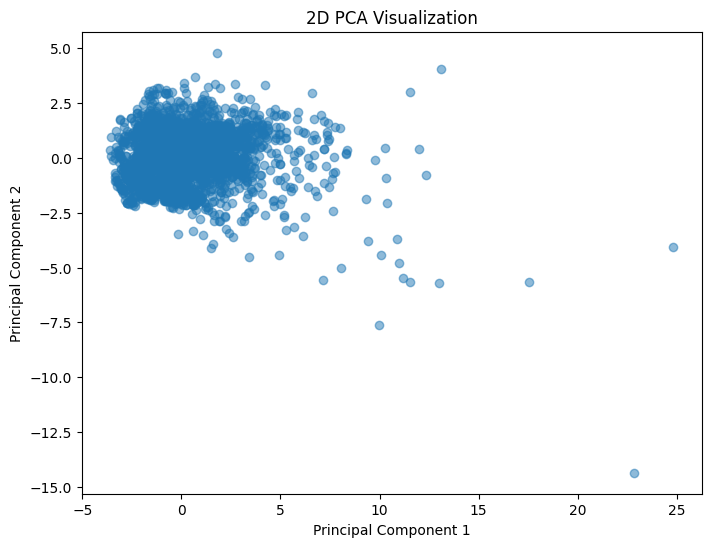

In [73]:
import matplotlib.pyplot as plt

# Scatter plot for 2D PCA
plt.figure(figsize=(8,6))
plt.scatter(df_pca_2d[:,0], df_pca_2d[:,1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.show()


Code: 3D PCA Visualization

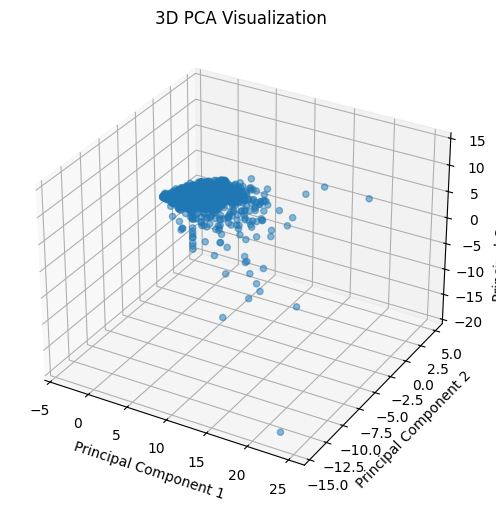

In [74]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_pca_3d[:,0], df_pca_3d[:,1], df_pca_3d[:,2], alpha=0.5)
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization')
plt.show()


Step 6: Calculate Percentage of Variance Retained


We calculate the cumulative variance explained to check how much information remains after PCA.

In [75]:
import numpy as np

# PCA with all components
pca_full = PCA().fit(df_scaled)

# Cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Find number of components to retain 95% variance
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components needed for 95% variance: {num_components_95}")


Number of components needed for 95% variance: 7


Step 7: Extract Top 3 Eigenvalues


Eigenvalues represent the amount of variance explained by each principal component.

In [76]:
# Eigenvalues
eigenvalues = pca_full.explained_variance_

# Get top 3 eigenvalues
top_3_eigenvalues = eigenvalues[:3]

print("Top 3 Eigenvalues:", top_3_eigenvalues)


Top 3 Eigenvalues: [3.51406515 1.04849875 0.96115461]


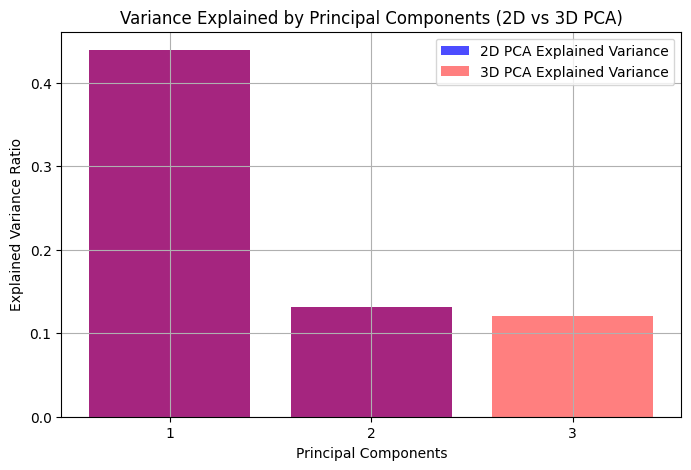

In [89]:
# Plot the variance explained by the first 2 and 3 principal components
plt.figure(figsize=(8, 5))

# Plot explained variance for 2D PCA
plt.bar([1, 2], explained_variance_2d, alpha=0.7, color='b', label='2D PCA Explained Variance')

# Plot explained variance for 3D PCA
plt.bar([1, 2, 3], explained_variance_3d, alpha=0.5, color='r', label='3D PCA Explained Variance')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Explained by Principal Components (2D vs 3D PCA)')
plt.xticks([1, 2, 3])
plt.legend()
plt.grid()
plt.show()

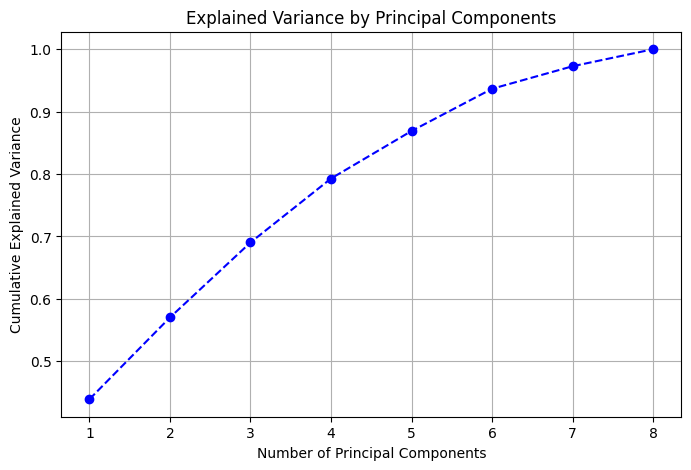

In [90]:
features=['year_built',	'beds',	'baths',	'baths_full',	'garage',	'sqft',	'stories',	'listPrice']

pca_full = PCA(n_components=len(features)).fit(df_scaled)  # Fit PCA to all components

# ✅ FIXED: Use `pca_full.explained_variance_ratio_` instead of `df_pca_2d`
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(features) + 1), np.cumsum(pca_full.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid()
plt.show()

##CLUSTERING

## K MEANS CLUSTERING Silhouette Method

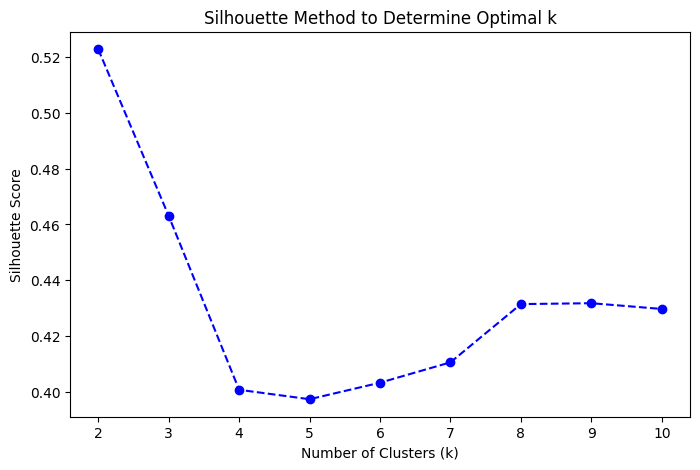

In [77]:
silhouette_scores = []
K = range(2, 11)  # Checking k values from 2 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(df_pca_2d)
    silhouette_avg = silhouette_score(df_pca_2d, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score for Different k
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method to Determine Optimal k')
plt.show()


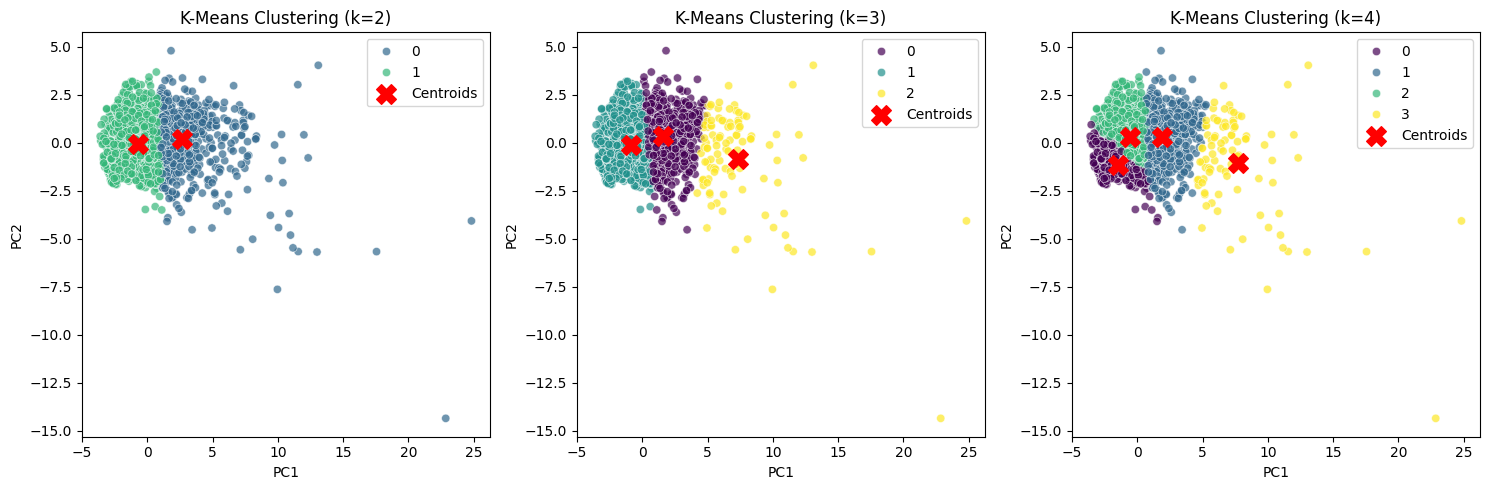

In [78]:
k_values = [2, 3, 4]  # Set k values for clustering

plt.figure(figsize=(15, 5))  # Create a figure for subplots

for i, k in enumerate(k_values, 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    df_pca_2d_clustered = pd.DataFrame(df_pca_2d, columns=['PC1', 'PC2'])  # Copy PCA Data
    df_pca_2d_clustered['Cluster'] = kmeans.fit_predict(df_pca_2d)  # Apply K-Means clustering

    # Create subplot for current k value
    plt.subplot(1, 3, i)
    sns.scatterplot(x=df_pca_2d_clustered['PC1'], y=df_pca_2d_clustered['PC2'],
                    hue=df_pca_2d_clustered['Cluster'], palette='viridis', alpha=0.7)

    # Plot cluster centroids
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
                s=200, c='red', marker='X', label='Centroids')

    plt.title(f'K-Means Clustering (k={k})')
    plt.legend()

plt.tight_layout()  # Adjust subplot spacing
plt.show()

##K-Means Clustering with Best k

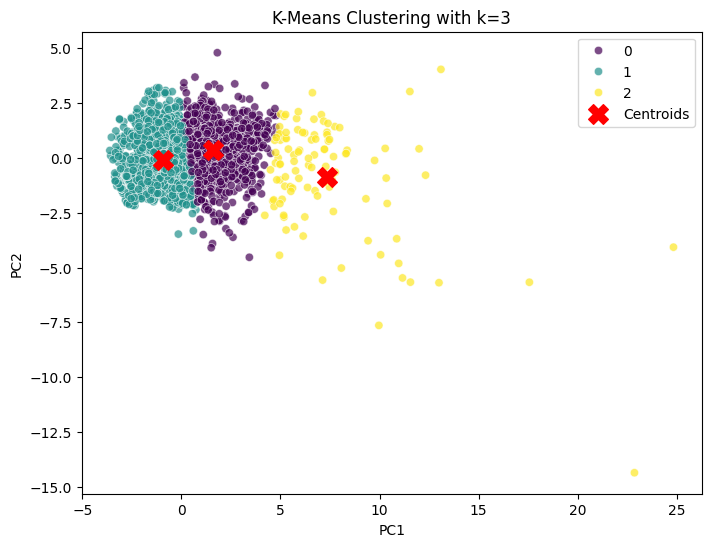

In [79]:
optimal_k = 3  # Choose based on the silhouette method result
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
df_pca_2d_clustered = df_pca_2d.copy()
df_pca_2d_clustered = pd.DataFrame(df_pca_2d_clustered, columns=['PC1', 'PC2'])
df_pca_2d_clustered['Cluster'] = kmeans.fit_predict(df_pca_2d)

# Plot K-Means Clustering Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_2d_clustered['PC1'], y=df_pca_2d_clustered['PC2'], hue=df_pca_2d_clustered['Cluster'], palette='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.legend()
plt.title(f'K-Means Clustering with k={optimal_k}')
plt.show()


##Hierarchical Clustering
Generate a Dendrogram

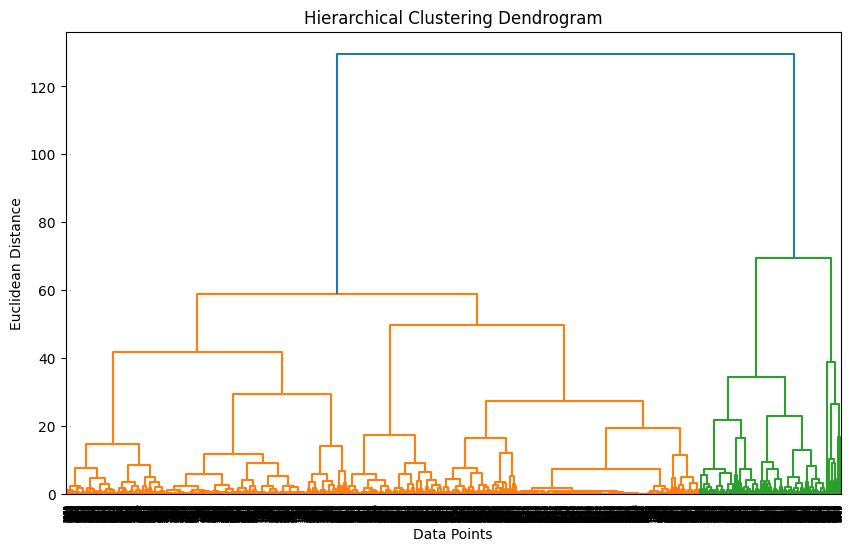

In [80]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df_pca_2d, method='ward'))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()


Step 3.2: Apply Hierarchical Clustering

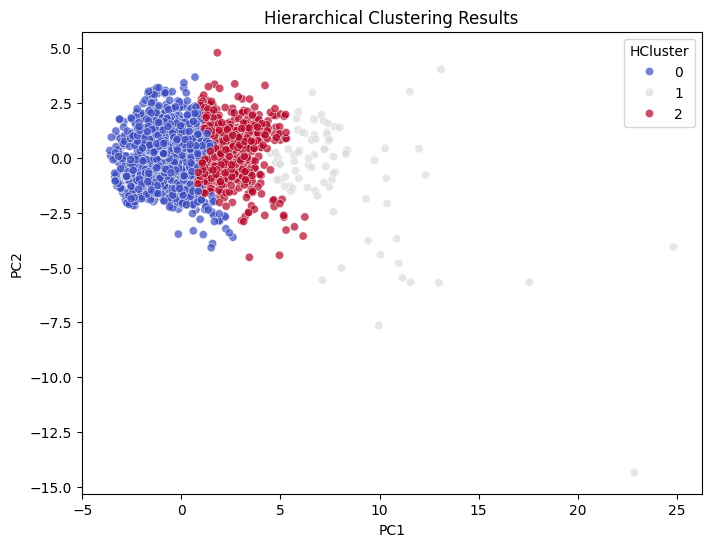

In [81]:
from sklearn.cluster import AgglomerativeClustering

# Using the same number of clusters as K-Means (k=3)
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, metric='euclidean', linkage='ward')
df_pca_2d_clustered['HCluster'] = hierarchical.fit_predict(df_pca_2d)

# Plot Hierarchical Clustering Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_2d_clustered['PC1'], y=df_pca_2d_clustered['PC2'], hue=df_pca_2d_clustered['HCluster'], palette='coolwarm', alpha=0.7)
plt.title('Hierarchical Clustering Results')
plt.show()


##DBSCAN Clustering

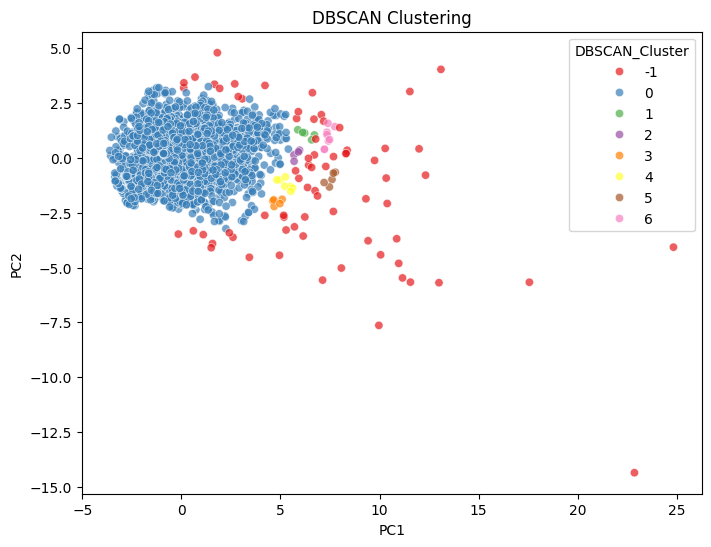

In [82]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)  # Parameters may need tuning
df_pca_2d_clustered['DBSCAN_Cluster'] = dbscan.fit_predict(df_pca_2d)

# Plot DBSCAN Clustering Results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_pca_2d_clustered['PC1'], y=df_pca_2d_clustered['PC2'], hue=df_pca_2d_clustered['DBSCAN_Cluster'], palette='Set1', alpha=0.7)
plt.title('DBSCAN Clustering')
plt.show()
